<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Coffee Recommandation
              
</p>
</div>

Data Science capstone project<br>
Blog post URL:https://github.com/nkbuddy/capstone-coffee-recommendation-system
<p>Qilun Chen</p>
<br>
<br>

<div align = "right">
<img src="images\coffee_cup.png" align = "right" width="600"/>
</div>

### Table of Contents
* [STEP 1: Define the Problem](#Define-the-Problem)
* [Step 2: Gather the Data](#Gather-the-Data)
* [Step 3: Prepare Data for Consumption](#Prepare-Data-for-Consumption)
    * [3.1 Import Libraries](#Import-Libraries)
        * [3.11 Load Data Modelling Libraries](#Load-Data-Modelling-Libraries)
    * [3.2 Meet and Greet Data](#Meet-and-Greet-Data)
        * [3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting](#4C)
        * [3.22 Clean Data](#Clean-Data)
        * [3.23 Convert Formats](#Convert-Formats)
        * [3.24 Da-Double Check Cleaned Data](#Da-Double-Check-Cleaned-Data)
        * [3.25 Split Training and Testing Data](#Split-Training-and-Testing-Data)
* [Step 4: Perform Exploratory Analysis with Statistics](#Perform-Exploratory-Analysis-with-Statistics)
* [Step 5: Model Data](#Model-Data)
    * [5.1 Evaluate Model Performance](#Evaluate-Model-Performance)
        * [5.11 Model Performance with Cross-Validation (CV)](#CV)
        * [5.12 Tune Model with Hyper-Parameters](#Tune-Model-with-Hyper-Parameters)
        * [5.13 Tune Model with Feature Selection](#Tune-Model-with-Feature-Selection)
* [Step 6: Validate and Implement](#Validate-and-Implement)
* [STEP 7: Optimize and Strategize](#Optimize-and-Strategize)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
STEP 1: Define the Problem <a class="anchor" id="Define-the-Problem"></a>
              
</p>
</div>

Giving recommendation to coffee lover. Baker or bartender wants explore coffee for their new products.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Step 2: Gather the Data <a class="anchor" id="Gather-the-Data"></a>
              
</p>
</div>

<div align = "middle">
<img src="images\review_sample.png" align = "middle" width="650"/>
</div>

# Step 3: Prepare Data for Consumption <a class="anchor" id="Prepare-Data-for-Consumption"></a>

## 3.1 Import Libraries <a class="anchor" id="Import-Libraries"></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from copy import deepcopy

#visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# NLP modules we will use for text normalization
import re #regex 
import nltk # the natural language toolkit
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag

# feature construction
from sklearn.feature_extraction.text import TfidfVectorizer #use this to create BoW matrix

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.manifold import TSNE
import nltk
nltk.download('punkt')
np.random.seed(0)
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import GridspecLayout
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/alanchan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## 3.11 Load Data Modelling Libraries <a class="anchor" id="Load-Data-Modelling-Libraries"></a>

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

In [3]:
#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from matplotlib import pyplot

## 3.2 Meet and Greet Data <a class="anchor" id="Meet-and-Greet-Data"></a>

Web scraping from coffeereview.com <br>
1) coffee_score is number. The range is 0-100. higher is better.<br>
2) coffee_roaster_name is string. factory name.<br>
3) coffee_bean_name is string. coffe bean name.<br>
4) roaster_location is string. factory location.<br>
5) coffee_origin is string. coffee beans from which country.<br>
6) roast_level is string. different level of roast.<br>
7) agtron is number. number of roast level.<br>
8) estimate_price is number. the units are USD/6OZ<br>
9) review_date is day. The day wrote the review.<br>
10) aroma is number. The range is 0-10. higher number mean the smell of coffee beans is better.<br>
11) acidity_or_structure is number. The range is 0-10. higher number mean the coffee test is sour.<br>
12) body is number. The range is 0-10. higher number mean the mouthfeel is better.<br>
13) flavor is number. The range is 0-10. higher number mean strong flavor.<br>
14) aftertaste is number. The range is 0-10. higher number mean better aftertaste.<br>
15) blind assessment is string. Comments about the coffee base on touch, smell, sight, and hearing.<br>
16) notes is string. All comments about the coffee base on the roaster.<br>
17) bottom line is string. Comments about the coffee base on taste.

In [4]:
coffee_df = pd.read_csv("coffee_review")

In [5]:
print(coffee_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5748 non-null   int64  
 1   coffee_score          5748 non-null   object 
 2   coffee_roaster_name   5748 non-null   object 
 3   coffee_bean_name      5748 non-null   object 
 4   roaster_location      5746 non-null   object 
 5   coffee_origin         5236 non-null   object 
 6   roast_level           5114 non-null   object 
 7   agtron                5236 non-null   object 
 8   estimate_price        3734 non-null   object 
 9   review_date           5681 non-null   object 
 10  aroma                 5646 non-null   object 
 11  acidity_or_structure  1382 non-null   float64
 12  body                  4919 non-null   object 
 13  flavor                4917 non-null   object 
 14  aftertaste            4280 non-null   float64
 15  blind_assessment     

In [6]:
coffee_df.head()

,Unnamed: 0,coffee_score,coffee_roaster_name,coffee_bean_name,roaster_location,coffee_origin,roast_level,agtron,estimate_price,review_date,aroma,acidity_or_structure,body,flavor,aftertaste,blind_assessment,notes,bottom_line
0,0,94,Nostalgia Coffee Roasters,Rwanda Gatare,"San Diego, California","Nyamasheke District, Western Province, Rwanda",Medium-Light,58/80,$22.00/12 ounces,May 2022,9,9.0,9\t\t\t\t\t\t\t,9,8.0,"Blind Assessment: Very chocolaty, rich-toned. ...",Notes: Produced by smallholding farmers surrou...,"The Bottom Line: A confident, complex Rwanda c..."
1,1,93,Yellow Brick Coffee,Guatemala ASPROCDEGUA Women Producers,"Tucson, Arizona","Huehuetenango, Guatemala",Medium-Light,58/77,$18.00/12 ounces,May 2022,9,8.0,9\t\t\t\t\t\t\t,9,8.0,"Blind Assessment: Crisply chocolaty, nut-toned...",Notes: Produced by 664 smallholding women farm...,"The Bottom Line: A balanced, inviting women-fa..."
2,2,94,Coffee by Design,Costa Rica Naranjo Danilo Salazar Arias,"Portland, Maine","Alajuela, Costa Rica",Medium-Light,60/77,$23.00/12 ounces,May 2022,9,9.0,9\t\t\t\t\t\t\t,9,8.0,"Blind Assessment: Bright, richly sweet-tart, f...",Notes: Produced by Danilo Salazar Arias of San...,"The Bottom Line: A lively, juicy-bright natura..."
3,3,93,Coffee by Design,Kenya Kahunyo AA,"Portland, Maine","Nyeri growing region, south-central Kenya",Medium-Light,59/76,$22.00/16 ounces,May 2022,9,9.0,8\t\t\t\t\t\t\t,9,8.0,"Blind Assessment: Crisply sweet-savory. Date, ...","Notes: Despite grower discontent, unclear gove...","The Bottom Line: A savory, richly Kenya cup w..."
4,4,93,Coffee by Design,Honduras COMSA Oscar Omar Alonzo,"Portland, Maine","Marcala, Honduras",Medium-Light,58/74,$18.50/12 ounces,May 2022,9,8.0,9\t\t\t\t\t\t\t,9,8.0,Blind Assessment: A balanced honey-processed c...,Notes: Produced by Oscar Omar Alonzo of Finca ...,"The Bottom Line: Delicately sweet-tart, deeply..."


### 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting <a class="anchor" id="4C"></a>

In [7]:
print('columns with null values:\n', coffee_df.isnull().sum())
print("-"*10)
coffee_df.describe(include='all')

columns with null values:
 Unnamed: 0                 0
coffee_score               0
coffee_roaster_name        0
coffee_bean_name           0
roaster_location           2
coffee_origin            512
roast_level              634
agtron                   512
estimate_price          2014
review_date               67
aroma                    102
acidity_or_structure    4366
body                     829
flavor                   831
aftertaste              1468
blind_assessment           0
notes                      0
bottom_line             3837
dtype: int64
----------


,Unnamed: 0,coffee_score,coffee_roaster_name,coffee_bean_name,roaster_location,coffee_origin,roast_level,agtron,estimate_price,review_date,aroma,acidity_or_structure,body,flavor,aftertaste,blind_assessment,notes,bottom_line
count,5748.000000,5748,5748,5748,5746,5236,5114,5236,3734,5681,5646,1382.000000,4919,4917,4280.000000,5748,5748,1911
unique,NaN,38,1128,4742,735,1786,6,1031,1068,288,35,NaN,32,40,NaN,5743,5539,1910
top,NaN,93,JBC Coffee Roasters,Ethiopia Yirgacheffe,"Madison, Wisconsin",Not disclosed.,Medium-Light,58/76,$18.00/12 ounces,August 2020,9,NaN,8\t\t\t\t\t\t\t,9,NaN,Blind Assessment: Bright but well-matrixed aci...,Notes: Keurig brewing devices were among the f...,The Bottom Line: A cocoa-toned natural-process...
freq,NaN,1002,302,26,326,347,2248,88,147,50,2622,NaN,2417,2699,NaN,2,7,2
mean,2873.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.429812,NaN,NaN,7.926869,NaN,NaN,NaN
std,1659.449005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.662807,NaN,NaN,0.764073,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,NaN,NaN,NaN
25%,1436.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,8.000000,NaN,NaN,NaN
50%,2873.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,8.000000,NaN,NaN,NaN
75%,4310.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,8.000000,NaN,NaN,NaN


### 3.22 Clean Data <a class="anchor" id="Clean-Data"></a>

In [8]:
cleaned_df = coffee_df.dropna()

In [9]:
cleaned_df.loc[:, 'coffee_score'] = cleaned_df["coffee_score"].astype('int64')
cleaned_df.loc[:, 'coffee_roaster_name'] = cleaned_df["coffee_roaster_name"].astype('string')
cleaned_df.loc[:, 'coffee_bean_name'] = cleaned_df["coffee_bean_name"].astype('string')
cleaned_df.loc[:, 'coffee_roaster_name'] = cleaned_df["coffee_roaster_name"].astype('string')
cleaned_df.loc[:, 'roaster_location'] = cleaned_df["roaster_location"].astype('string')
cleaned_df.loc[:, 'coffee_origin'] = cleaned_df["coffee_origin"].astype('string')
cleaned_df.loc[:, 'roast_level'] = cleaned_df["roast_level"].astype('string')
cleaned_df.loc[:, 'agtron'] = cleaned_df["agtron"].astype('string')
cleaned_df.loc[:, 'estimate_price'] = cleaned_df["estimate_price"].astype('string')
cleaned_df.loc[:, 'review_date'] = cleaned_df["review_date"].astype('string')
cleaned_df.loc[:, 'aroma'] = cleaned_df["aroma"].astype('int64')
cleaned_df.loc[:, 'acidity_or_structure'] = cleaned_df["acidity_or_structure"].astype('int64')
cleaned_df.loc[:, 'body'] = cleaned_df["body"].str.replace("\t\t\t\t\t\t\t", "").astype('int64')
cleaned_df.loc[:, 'flavor'] = cleaned_df["flavor"].astype('int64')
cleaned_df.loc[:, 'aftertaste'] = cleaned_df["aftertaste"].astype('int64')
cleaned_df.loc[:, 'blind_assessment'] = cleaned_df["blind_assessment"].astype('string')
cleaned_df.loc[:, 'notes'] = cleaned_df["notes"].astype('string')
cleaned_df.loc[:, 'bottom_line'] = cleaned_df["bottom_line"].astype('string')

In [10]:
cleaned_df.drop(cleaned_df[cleaned_df['roast_level'] == 'NA'].index, inplace = True)
cleaned_df.drop(cleaned_df[cleaned_df['agtron'] == 'NA/NA'].index, inplace = True)

In [11]:
cleaned_df['bean_type'] = "robusta"
cleaned_df['bean_type'].loc[cleaned_df['notes'].str.contains("arabica")] = "arabica"
cleaned_df['bean_type'].loc[cleaned_df['notes'].str.contains("Arabica")] = "arabica"
cleaned_df.loc[:, 'bean_type'] = cleaned_df["bean_type"].astype('string')

In [12]:
drop_column = ['Unnamed: 0','roaster_location','review_date','notes']
#cleaned_df.drop(drop_column, axis=1, inplace = True)

In [13]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1549
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            1362 non-null   int64 
 1   coffee_score          1362 non-null   int64 
 2   coffee_roaster_name   1362 non-null   string
 3   coffee_bean_name      1362 non-null   string
 4   roaster_location      1362 non-null   string
 5   coffee_origin         1362 non-null   string
 6   roast_level           1362 non-null   string
 7   agtron                1362 non-null   string
 8   estimate_price        1362 non-null   string
 9   review_date           1362 non-null   string
 10  aroma                 1362 non-null   int64 
 11  acidity_or_structure  1362 non-null   int64 
 12  body                  1362 non-null   int64 
 13  flavor                1362 non-null   int64 
 14  aftertaste            1362 non-null   int64 
 15  blind_assessment      1362 non-null   

In [14]:
cleaned_df['min_agtron'] = cleaned_df['agtron'].map(lambda x: x.split('/')[0])
cleaned_df['max_agtron'] = cleaned_df['agtron'].map(lambda x: x.split('/')[1])
cleaned_df.loc[:, 'min_agtron'] = cleaned_df["min_agtron"].astype('int64')
cleaned_df.loc[:, 'max_agtron'] = cleaned_df["max_agtron"].astype('int64')

In [15]:
cleaned_df['agtron_difference'] = cleaned_df['max_agtron'] - cleaned_df['min_agtron']

In [16]:
cleaned_df.drop(cleaned_df[cleaned_df['estimate_price'].str.contains('ounces') == False].index, inplace = True)
cleaned_df.drop(cleaned_df[cleaned_df['estimate_price'].str.contains('NT') == True].index, inplace = True)
cleaned_df.drop(cleaned_df[cleaned_df['estimate_price'].str.contains('CAD') == True].index, inplace = True)

In [17]:
cleaned_df['estimate_price_USD'] = cleaned_df['estimate_price'].map(lambda x: x.split('.')[0])
cleaned_df['estimate_price_ounces'] = cleaned_df['estimate_price'].map(lambda x: x.split('/')[1])

In [18]:
cleaned_df['estimate_price_USD'].unique()

array(['$22', '$18', '$23', '$35', '$16', '$28', '$24', '$25', '$19',
       '$20', '$17', '$30', '$26', '$140', '$21', '$65', '$14', '$13',
       '$15', '$12', '$9', '$48', '$69', '$40', '$42', '$36', '$49',
       '$11', '$45', '$34', '$38', '$29', '$50', '$10', '$5', '$75',
       '$89', '$150', '$145', '$62', '$95', '$60', '$120', '$32', '$27',
       '$80', '$54', '$39', '$74', '$87', '$33', '$47', '$56', '$55',
       '$85', '$20/12 ounces', '$64', 'US $20', '$6', '$4', '$8', '$125',
       '18', '$31', '$63', '$37', '$44', '#23', '$70', '$51'],
      dtype=object)

In [19]:
cleaned_df.loc[:, 'estimate_price_USD'] = cleaned_df["estimate_price_USD"].str.replace("$", "")
cleaned_df.loc[:, 'estimate_price_USD'] = cleaned_df["estimate_price_USD"].str.replace("/12 ounces", "")
cleaned_df.loc[:, 'estimate_price_USD'] = cleaned_df["estimate_price_USD"].str.replace("US ", "")
cleaned_df.loc[:, 'estimate_price_USD'] = cleaned_df["estimate_price_USD"].str.replace("#", "")

In [20]:
cleaned_df['estimate_price_ounces'].unique()

array(['12 ounces', '16 ounces', '8 ounces', '5 ounces', '4 ounces',
       ' 12 ounces', '7 ounces', '24 ounces', '6 ounces', '10.5 ounces',
       '10 ounces', '12.64 ounces', '11 ounces', '14 ounces', '2 ounces',
       '20 ounces (2 types)', '8 ounces (currently on sale for $36.76)',
       '12 ounces; $35.00', '12 ounces ($79.00',
       '12 ounces (includes shipping)', '12 ounces; $50.00', ' 7 ounces',
       '22 ounces', '32 ounces', '4 ounces; limited availability',
       '8 ounces (packaged as a "duo" with Bourbon Rey Guatemala)',
       '8 ounces (packaged as a "duo" with the Bourbon Rey Jamaica)',
       '8 ounces*', '12 ounces online; $12.99'], dtype=object)

In [21]:
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace(" ", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("\(", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("\)", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("\"", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("$", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace(";", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("ounces", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("2types", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("currentlyonsalefor36.76", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("35.00", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("79.00", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("includesshipping", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("50.00", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("limitedavailability", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("packagedasaduowithBourbonReyGuatemala", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("packagedasaduowiththeBourbonReyJamaica", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("*", "")
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].str.replace("online12.99", "")

In [22]:
cleaned_df.loc[:, 'estimate_price_USD'] = cleaned_df["estimate_price_USD"].astype('float')
cleaned_df.loc[:, 'estimate_price_ounces'] = cleaned_df["estimate_price_ounces"].astype('float64')

In [23]:
cleaned_df['estimate_price_USD_per_6ounces'] = round((cleaned_df["estimate_price_USD"] / cleaned_df["estimate_price_ounces"])*6, 2)

In [24]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 0 to 1549
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1278 non-null   int64  
 1   coffee_score                    1278 non-null   int64  
 2   coffee_roaster_name             1278 non-null   string 
 3   coffee_bean_name                1278 non-null   string 
 4   roaster_location                1278 non-null   string 
 5   coffee_origin                   1278 non-null   string 
 6   roast_level                     1278 non-null   string 
 7   agtron                          1278 non-null   string 
 8   estimate_price                  1278 non-null   string 
 9   review_date                     1278 non-null   string 
 10  aroma                           1278 non-null   int64  
 11  acidity_or_structure            1278 non-null   int64  
 12  body                            12

In [25]:
drop_column = ['agtron','estimate_price','estimate_price_USD','estimate_price_ounces']
#cleaned_df.drop(drop_column, axis=1, inplace = True)

### 3.23 Convert Formats <a class="anchor" id="Convert-Formats"></a>

In [26]:
cleaned_df.describe(include='all')

,Unnamed: 0,coffee_score,coffee_roaster_name,coffee_bean_name,roaster_location,coffee_origin,roast_level,agtron,estimate_price,review_date,...,blind_assessment,notes,bottom_line,bean_type,min_agtron,max_agtron,agtron_difference,estimate_price_USD,estimate_price_ounces,estimate_price_USD_per_6ounces
count,1278.000000,1278.000000,1278,1278,1278,1278,1278,1278,1278,1278,...,1278,1278,1278,1278,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000
unique,NaN,NaN,247,1161,199,624,5,250,322,59,...,1277,1255,1277,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,JBC Coffee Roasters,Kona Mocca®,"Madison, Wisconsin","Yirgacheffe growing region, southern Ethiopia",Medium-Light,58/76,$18.00/12 ounces,August 2020,...,"Blind Assessment: Richly chocolaty, deeply swe...",Notes: Mystic Monk Coffee is a small-batch roa...,The Bottom Line: A cocoa-toned natural-process...,arabica,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,130,5,130,48,941,69,70,48,...,2,4,2,926,NaN,NaN,NaN,NaN,NaN,NaN
mean,742.655712,92.899844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,60.472613,74.931142,14.458529,22.907668,10.923255,15.201847
std,447.862777,1.727111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,146.734186,6.582049,146.842500,14.688654,2.704378,17.546818
min,0.000000,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31.000000,38.000000,-5182.000000,4.000000,2.000000,1.500000
25%,358.250000,92.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,53.000000,72.000000,17.000000,16.000000,12.000000,8.000000
50%,721.500000,93.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,56.000000,76.000000,18.000000,19.000000,12.000000,9.500000
75%,1116.750000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.000000,78.000000,22.000000,24.000000,12.000000,13.500000


In [27]:
cleaned_df['best_value'] = round(cleaned_df['coffee_score'] / cleaned_df['estimate_price_USD_per_6ounces'], 2)

In [28]:
cleaned_df.sort_values(by='best_value',ascending=False).head()

,Unnamed: 0,coffee_score,coffee_roaster_name,coffee_bean_name,roaster_location,coffee_origin,roast_level,agtron,estimate_price,review_date,...,notes,bottom_line,bean_type,min_agtron,max_agtron,agtron_difference,estimate_price_USD,estimate_price_ounces,estimate_price_USD_per_6ounces,best_value
889,889,87,Hill's Bros. Coffee,100% Guatemalan,"San Francisco, California",Guatemala,Medium-Dark,41/53,$8.99/32 ounces,February 2020,...,Notes: This coffee was tested as part of a sur...,The Bottom Line: A sweet though muted Guatemal...,robusta,41,53,12,8.0,32.0,1.50,58.00
887,887,89,HT Traders,Colombia,"Matthews, North Carolina",Colombia,Medium-Dark,40/56,$4.99/12 ounces,February 2020,...,Notes: This coffee tied for the fifth-highest ...,"The Bottom Line: A comfortingly familiar, dark...",robusta,40,56,16,4.0,12.0,2.00,44.50
886,886,89,Cameron’s Coffee,Guatemala (from bulk bin),"Shakopee, Minnesota",Guatemala,Medium,44/60,$6.99/16 ounces,February 2020,...,Notes: This coffee was tested as part of a sur...,The Bottom Line: A good-value darker roasted G...,robusta,44,60,16,6.0,16.0,2.25,39.56
888,888,88,Eight O'Clock Coffee,Colombia,"Landover, Maryland",Colombia,Medium,46/60,$9.29/22 ounces,February 2020,...,Notes: This coffee was tested as part of a sur...,"The Bottom Line: A roast-prominent, cocoa-tone...",robusta,46,60,14,9.0,22.0,2.45,35.92
163,163,89,El Gran Cafe,5a Sur,"Antigua, Guatemala","Antigua, Guatemala",Medium,52/64,$5.00/12 ounces,December 2021,...,"Notes: Produced at Beneficio La Esperanza, fro...",The Bottom Line: A darkish medium version of a...,arabica,52,64,12,5.0,12.0,2.50,35.60


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Feature engineering
</p>
</div>

bean_type<br>
estimate_price_USD_per_6ounces<br>
best_value<br>
taste_like<br>
agtron_difference<br>

bean_type : using NLP find out arabica in notes
estimate_price_USD_per_6ounces : convert the estimate price to USD per 6 ounces
best_value : use coffee score divided by price
taste_like : using NLP find out find flavor in bottom_line and blind_assessment
agtron_difference : maximum agtron subtracted by minimum agtron

<div align = "middle">
<img src="images\coffee_wheel.webp" align = "middle" width="800"/>
</div>

#### Natural Language Processing

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
topic model
</p>
</div>

In [31]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# Create an intance of the RegexpTokenizer with the variable name `tokenizer`
# The regex pattern should select all words with three or more characters
pattern = r"(?u)\w{3,}"
tokenizer = RegexpTokenizer(pattern)

# Create a list of stopwords in English
stopwords_list = stopwords.words('english')

# Create an instance of nltk's PorterStemmer with the variable name `stemmer`
stemmer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alanchan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alanchan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
stopwords_list.append('blind')
stopwords_list.append('assessment')
stopwords_list.append('bottom')
stopwords_list.append('line')
stopwords_list.append('cup')
stopwords_list.append('dried')
stopwords_list.append('dark')
stopwords_list.append('brown')
stopwords_list.append('overall')
stopwords_list.append('like')
stopwords_list.append('ripe')
stopwords_list.append('black')
stopwords_list.append('fresh')
stopwords_list.append('raw')
stopwords_list.append('notes')
stopwords_list.append('finish')

In [33]:
def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    # Standardize case (lowercase the text)
    # your code here
    text = text.lower()
    
    # Tokenize text using `tokenizer`
    # your code here
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords using `stopwords_list`
    # your code here
    stopwords = [word for word in tokens if word not in stopwords_list]
    
    # Stem the tokenized text using `stemmer`
    # your code here
    preprocess = [stemmer.lemmatize(word)for word in stopwords]
    
    # Return the preprocessed text
    # your code here
    return preprocess

preprocess_text("This is an example sentence for preprocessing.", tokenizer, stopwords_list, stemmer)

['example', 'sentence', 'preprocessing']

In [34]:
cleaned_df["preprocessed_blind_assessment"] = cleaned_df["blind_assessment"].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))
cleaned_df["preprocessed_bottom_line"] = cleaned_df["bottom_line"].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))
cleaned_df["preprocessed_notes"] = cleaned_df["notes"].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))

In [35]:
pd.set_option('display.max_columns', None)
cleaned_df.describe(include='all')

,Unnamed: 0,coffee_score,coffee_roaster_name,coffee_bean_name,roaster_location,coffee_origin,roast_level,agtron,estimate_price,review_date,aroma,acidity_or_structure,body,flavor,aftertaste,blind_assessment,notes,bottom_line,bean_type,min_agtron,max_agtron,agtron_difference,estimate_price_USD,estimate_price_ounces,estimate_price_USD_per_6ounces,best_value,preprocessed_blind_assessment,preprocessed_bottom_line,preprocessed_notes
count,1278.000000,1278.000000,1278,1278,1278,1278,1278,1278,1278,1278,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278,1278,1278,1278,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278,1278,1278
unique,NaN,NaN,247,1161,199,624,5,250,322,59,NaN,NaN,NaN,NaN,NaN,1277,1255,1277,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277,1277,1249
top,NaN,NaN,JBC Coffee Roasters,Kona Mocca®,"Madison, Wisconsin","Yirgacheffe growing region, southern Ethiopia",Medium-Light,58/76,$18.00/12 ounces,August 2020,NaN,NaN,NaN,NaN,NaN,"Blind Assessment: Richly chocolaty, deeply swe...",Notes: Mystic Monk Coffee is a small-batch roa...,The Bottom Line: A cocoa-toned natural-process...,arabica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[richly, chocolaty, deeply, sweet, chocolate, ...","[cocoa, toned, natural, processed, ethiopia, d...","[mystic, monk, coffee, small, batch, roaster, ..."
freq,NaN,NaN,130,5,130,48,941,69,70,48,NaN,NaN,NaN,NaN,NaN,2,4,2,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,4
mean,742.655712,92.899844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.812989,8.453834,8.602504,8.953052,8.075900,NaN,NaN,NaN,NaN,60.472613,74.931142,14.458529,22.907668,10.923255,15.201847,9.131964,NaN,NaN,NaN
std,447.862777,1.727111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.440958,0.574024,0.516048,0.361827,0.494003,NaN,NaN,NaN,NaN,146.734186,6.582049,146.842500,14.688654,2.704378,17.546818,4.382157,NaN,NaN,NaN
min,0.000000,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,7.000000,7.000000,6.000000,NaN,NaN,NaN,NaN,31.000000,38.000000,-5182.000000,4.000000,2.000000,1.500000,0.430000,NaN,NaN,NaN
25%,358.250000,92.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,8.000000,8.000000,9.000000,8.000000,NaN,NaN,NaN,NaN,53.000000,72.000000,17.000000,16.000000,12.000000,8.000000,7.040000,NaN,NaN,NaN
50%,721.500000,93.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,8.000000,9.000000,9.000000,8.000000,NaN,NaN,NaN,NaN,56.000000,76.000000,18.000000,19.000000,12.000000,9.500000,9.790000,NaN,NaN,NaN
75%,1116.750000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,9.000000,9.000000,9.000000,8.000000,NaN,NaN,NaN,NaN,58.000000,78.000000,22.000000,24.000000,12.000000,13.500000,11.500000,NaN,NaN,NaN


In [36]:
categorical_widget = widgets.ToggleButtons(
    options=['roast_level', 'bean_type'],
    description='',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of roast_level', 'Description of bean_type'],
#     icons=['check'] * 3
)
categorical_widget

ToggleButtons(options=('roast_level', 'bean_type'), tooltips=('Description of roast_level', 'Description of be…

In [37]:
nlp_preprocessed_widget = widgets.RadioButtons(
    options=['taste_like', 'preprocessed_notes','preprocessed_bottom_line', 'preprocessed_blind_assessment'],
#    value='pineapple', # Defaults to 'pineapple'
    layout={'width': 'max-content'}, # If the items' names are long
    description='',
    disabled=False
)
nlp_preprocessed_widget

RadioButtons(layout=Layout(width='max-content'), options=('taste_like', 'preprocessed_notes', 'preprocessed_bo…

In [38]:
def nlp_plot(target=categorical_widget, preprocessed=nlp_preprocessed_widget):
    fig, axes = plt.subplots(nrows=len(cleaned_df[target].unique()), figsize=(12, 12))
    plotted_words_and_colors = {}
    color_palette = sns.color_palette('cividis', n_colors=38)
    data_by_genre = [y for _, y in cleaned_df.groupby(target, as_index=False)]
    for idx, genre_df in enumerate(data_by_genre):
        all_words_in_genre = genre_df[preprocessed].explode()
        top_10 = all_words_in_genre.value_counts()[:10]
        colors = []
        for word in top_10.index:
            if word not in plotted_words_and_colors:
                new_color = color_palette.pop(0)
                plotted_words_and_colors[word] = new_color
            colors.append(plotted_words_and_colors[word])
        ax = axes[idx]
        ax.bar(top_10.index, top_10.values, color=colors)
        ax.set_title(genre_df.iloc[0][target])
    fig.tight_layout()

In [39]:
#interact(nlp_plot,target=categorical_widget, preprocessed=nlp_preprocessed_widget);

In [40]:
from sklearn.model_selection import train_test_split

# Convert token lists to strings
cleaned_df["joined_preprocessed_bottom_line"] = cleaned_df["preprocessed_bottom_line"].str.join(" ")

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_df["joined_preprocessed_bottom_line"], cleaned_df.roast_level, test_size=0.3, random_state=2021)

In [41]:
# Import the CountVectorizer object from sklearn
from sklearn.feature_extraction.text import CountVectorizer
# your code here

# Create a `vectorizer` instance
# your code here
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data
# your code here
vectorizer.fit(X_train,y_train)

CountVectorizer()

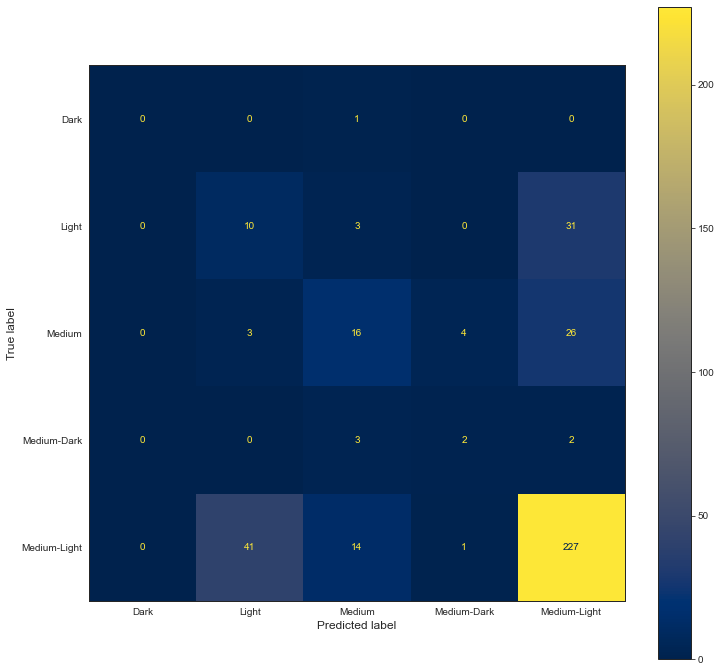

In [42]:
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize `dt`
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train_vectorized,y_train)
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(dt, X_test_vectorized, y_test, ax=ax, cmap="cividis");

In [43]:
dt.score(X_test_vectorized, y_test)

0.6640625

======================================================

In [44]:
coffee_flavor_wheel_first_layer=['floral', 'fruity', 'sour','fermented', 'green','vegetative', 'other', 'roasted', 'spices', 'nutty','cocoa', 'sweet']
coffee_flavor_wheel_second_layer=['black','tea', 'floral', 'berry', 'dried','fruit', 'citrus','fruit', 'sour', 'alcohol','fermented', 'olive','oil', 'raw'\
    , 'green','vegetative', 'beany', 'papery','musty', 'chemical', 'pipetobacco', 'tobacco', 'burnt', 'cereal', 'pungent', 'pepper',\
         'brown','spice', 'nutty', 'cocoa', 'brown','sugar', 'vanilla', 'vanillin', 'overall','sweet', 'sweet','aromatics']
coffee_flavor_wheel_third_layer=['chamomile', 'rose', 'jasmine', 'blackberry', 'raspberry', 'blueberry', 'strawberry', 'raisin', 'prune', 'coconut', 'cherry',\
'pomegranate', 'pineapple', 'grape', 'apple', 'peach', 'pear', 'grapefruit', 'orange', 'lemon', 'lime', 'sour','aromatics', 'acetic','acid', 'butyric','acid', 'critric','acid',\
'malic','acid', 'winey', 'whisley', 'fermented', 'overripe', 'under','ripe', 'peapod', 'fresh', 'dark','green', 'vegetative', 'hay','like', 'herb','like', 'stable', 'cardboard',\
'papery', 'woody', 'moldy','damp', 'musty','dusty', 'musty','earthy', 'animalic', 'meaty','brothy', 'phenolic', 'bitter', 'salty', 'medicinal', 'petroleum', 'skunky', 'rubber',\
'acrid', 'ashy', 'smoky', 'brown', 'grain', 'malt', 'anise', 'nutmeg', 'cinnamon', 'clove', 'peanuts', 'hazelnut', 'almond', 'chocolate', 'dark','chocolate', 'molasses', 'mapple','syrup', 'caramelized', 'honey']

In [45]:
coffee_flavor_wheel_whole = coffee_flavor_wheel_first_layer + coffee_flavor_wheel_second_layer+coffee_flavor_wheel_third_layer


In [46]:
def find_flavor(text, flvorList, stemmer):
    
    # Remove stopwords using `stopwords_list`
    # your code here
    preprocess = [stemmer.lemmatize(word)for word in flvorList]

    flavor = [word for word in text if word in preprocess]
    
    
    # Return the preprocessed text
    # your code here
    return flavor

In [47]:
cleaned_df['preprocessed_comment'] = cleaned_df["preprocessed_blind_assessment"] + cleaned_df["preprocessed_bottom_line"] 

In [48]:
cleaned_df['taste_like'] =  cleaned_df["preprocessed_comment"].apply(lambda x: find_flavor(x, coffee_flavor_wheel_whole, stemmer))

In [49]:
cleaned_df['taste_like']

0       [chocolate, cherry, grapefruit, cherry, fruit,...
1       [chocolate, grapefruit, hazelnut, syrup, choco...
2       [sweet, fruit, pomegranate, chocolate, almond,...
3                                  [sweet, sugar, floral]
4       [honey, fruit, vanilla, floral, sweet, sweet, ...
                              ...                        
1545                [sweet, orange, chocolate, chocolate]
1546    [sweet, fruit, blueberry, blueberry, smoky, fr...
1547    [spice, grapefruit, almond, pear, fruit, spice...
1548    [sweet, peach, hazelnut, sweet, peach, hazelnu...
1549    [chocolate, cinnamon, roasted, cocoa, spice, c...
Name: taste_like, Length: 1278, dtype: object

### 3.24 Da-Double Check Cleaned Data <a class="anchor" id="Da-Double-Check-Cleaned-Data"></a>

In [50]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 0 to 1549
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1278 non-null   int64  
 1   coffee_score                     1278 non-null   int64  
 2   coffee_roaster_name              1278 non-null   string 
 3   coffee_bean_name                 1278 non-null   string 
 4   roaster_location                 1278 non-null   string 
 5   coffee_origin                    1278 non-null   string 
 6   roast_level                      1278 non-null   string 
 7   agtron                           1278 non-null   string 
 8   estimate_price                   1278 non-null   string 
 9   review_date                      1278 non-null   string 
 10  aroma                            1278 non-null   int64  
 11  acidity_or_structure             1278 non-null   int64  
 12  body                

### 3.25 Split Training and Testing Data <a class="anchor" id="Split-Training-and-Testing-Data"></a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Step 4: Perform Exploratory Analysis with Statistics <a class="anchor" id="Perform-Exploratory-Analysis-with-Statistics"></a>
</p>
</div>

In [51]:
number_columns = ['coffee_score', 'aroma','acidity_or_structure','body','flavor','aftertaste','estimate_price_USD_per_6ounces','best_value','agtron_difference']

In [52]:
number_columns_widget = widgets.SelectMultiple(
    options=number_columns,
    value=number_columns,
    #rows=10,
    description='columns:',
    disabled=False
)
number_columns_widget

SelectMultiple(description='columns:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8), options=('coffee_score', 'aroma', 'a…

In [53]:

def corr_heat_map(columns=number_columns_widget):
    columns = list(columns)
    df = cleaned_df[columns]
    plt.figure(figsize = (16, 12))
    sns.set(style="white")
    sns.heatmap(df.corr(), annot = True)


    plt.title('Correlation Matrix for Features')
    plt.show()

In [54]:
#interact(corr_heat_map,columns=number_columns_widget);

In [55]:

def categorical_count(columns = categorical_widget):
    sns.set(style="darkgrid")
    ax = sns.countplot(x=columns, data=cleaned_df, palette="Set2")

In [56]:
#interact(categorical_count, columns = categorical_widget);

In [57]:
def categorical_line(num_columns = number_columns_widget):
    sns.set(style="darkgrid")
    ax = sns.lineplot(x=num_columns[1], y=num_columns[0], data=cleaned_df)

In [58]:
#interact(categorical_line, num_columns = number_columns_widget);

In [59]:

def categorical_box(cat_columns = categorical_widget, num_columns = number_columns_widget):
    sns.set(style="darkgrid")
    ax = sns.catplot(x=cat_columns, y=num_columns[0], kind="box", data=cleaned_df, height=8.27, aspect=11.7/8.27)

In [85]:
interact(categorical_box,cat_columns = categorical_widget, num_columns = number_columns_widget);

interactive(children=(ToggleButtons(description='cat_columns', options=('roast_level', 'bean_type'), tooltips=…

# Step 5: Model Data <a class="anchor" id="Model-Data"></a>

In [61]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 0 to 1549
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1278 non-null   int64  
 1   coffee_score                     1278 non-null   int64  
 2   coffee_roaster_name              1278 non-null   string 
 3   coffee_bean_name                 1278 non-null   string 
 4   roaster_location                 1278 non-null   string 
 5   coffee_origin                    1278 non-null   string 
 6   roast_level                      1278 non-null   string 
 7   agtron                           1278 non-null   string 
 8   estimate_price                   1278 non-null   string 
 9   review_date                      1278 non-null   string 
 10  aroma                            1278 non-null   int64  
 11  acidity_or_structure             1278 non-null   int64  
 12  body                

In [62]:
from statsmodels.formula.api import ols
f = 'coffee_score~aroma+acidity_or_structure+body+flavor+aftertaste+estimate_price_USD_per_6ounces'
model = ols(formula=f, data=cleaned_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           coffee_score   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.093e+04
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:48:00   Log-Likelihood:                 1289.6
No. Observations:                1278   AIC:                            -2565.
Df Residuals:                    1271   BIC:                            -2529.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         50.1578      0.071    707.370      0.000      50.019      50.297
aroma                              1.0001      0.007    142.206      0.000       0.986       1.014
acidity_or_structure               1.0016      0.005    186.229      0.000       0.991       1.012
body                               0.9933      0.005    184.864      0.000       0.983       1.004
flavor                             0.9943      0.009    115.051      0.000       0.977       1.011
aftertaste                         0.9921      0.006    162.305      0.000       0.980       1.004
estimate_price_USD_per_6ounces  8.233e-05      0.000      0.542      0.588      -0.000       0.000
==============================================================================
Omnibus:                      969.584   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812127.908
Skew:                           2.168   Prob(JB):                         0.00
Kurtosis:                     126.420   Cond. No.                         794.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
from statsmodels.formula.api import ols
f = 'estimate_price_USD_per_6ounces~aroma+acidity_or_structure+body+flavor+aftertaste+coffee_score'
model = ols(formula=f, data=cleaned_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     estimate_price_USD_per_6ounces   R-squared:                       0.137
Model:                                        OLS   Adj. R-squared:                  0.133
Method:                             Least Squares   F-statistic:                     33.62
Date:                            Sun, 06 Nov 2022   Prob (F-statistic):           8.52e-38
Time:                                    15:48:00   Log-Likelihood:                -5380.1
No. Observations:                            1278   AIC:                         1.077e+04
Df Residuals:                                1271   BIC:                         1.081e+04
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -284.5069    260.092     -1.094      0.274    -794.764     225.750
aroma                   -1.8451      5.342     -0.345      0.730     -12.326       8.635
acidity_or_structure    -0.0817      5.284     -0.015      0.988     -10.448      10.284
body                    -1.0630      5.241     -0.203      0.839     -11.345       9.219
flavor                   3.7091      5.393      0.688      0.492      -6.870      14.289
aftertaste               3.9155      5.262      0.744      0.457      -6.407      14.239
coffee_score             2.8092      5.181      0.542      0.588      -7.355      12.973
==============================================================================
Omnibus:                     1461.581   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148300.962
Skew:                           5.678   Prob(JB):                         0.00
Kurtosis:                      54.537   Cond. No.                     5.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vector = cv.fit_transform(cleaned_df['joined_preprocessed_bottom_line']).toarray()


In [88]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [91]:
similarity

array([[1.        , 0.        , 0.21081851, ..., 0.11111111, 0.12598816,
        0.0860663 ],
       [0.        , 1.        , 0.14142136, ..., 0.        , 0.        ,
        0.        ],
       [0.21081851, 0.14142136, 1.        , ..., 0.10540926, 0.        ,
        0.08164966],
       ...,
       [0.11111111, 0.        , 0.10540926, ..., 1.        , 0.        ,
        0.17213259],
       [0.12598816, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0860663 , 0.        , 0.08164966, ..., 0.17213259, 0.        ,
        1.        ]])

In [95]:
cleaned_df[cleaned_df['coffee_roaster_name'] == 'Red Rooster Coffee Roaster'].index[0]

97

In [96]:
def recommend(coffee):
    index = cleaned_df[cleaned_df['coffee_roaster_name'] == coffee].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(cleaned_df.iloc[i[0]].coffee_roaster_name)
        

In [97]:
recommend('Red Rooster Coffee Roaster')

Folklore Coffee
RamsHead Coffee Roasters
Lexington Coffee Roasters
Temple Coffee and Tea
Peach Coffee Roasters


## 5.1 Evaluate Model Performance <a class="anchor" id="Evaluate-Model-Performance"></a>

### 5.11 Model Performance with Cross-Validation (CV) <a class="anchor" id="CV"></a>

### 5.12 Tune Model with Hyper-Parameters <a class="anchor" id="Tune-Model-with-Hyper-Parameters"></a>

### 5.13 Tune Model with Feature Selection <a class="anchor" id="Tune-Model-with-Feature-Selection"></a>

# Step 6: Validate and Implement <a class="anchor" id="Validate-and-Implement"></a>

In [64]:
aroma_widget = widgets.IntRangeSlider(
    value=[cleaned_df.aroma.unique().min(),cleaned_df.aroma.unique().max()],
    min=cleaned_df.aroma.unique().min(),
    max=cleaned_df.aroma.unique().max(),
    step=1,
    description='aroma:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
aroma_widget

IntRangeSlider(value=(7, 10), continuous_update=False, description='aroma:', max=10, min=7)

In [65]:
acidity_or_structure_widget = widgets.IntRangeSlider(
    value=[cleaned_df.acidity_or_structure.unique().min(),cleaned_df.acidity_or_structure.unique().max()],
    min=cleaned_df.acidity_or_structure.unique().min(),
    max=cleaned_df.acidity_or_structure.unique().max(),
    step=1,
    description='acidity/structure:',
    style= {'description_width': 'initial'},
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
acidity_or_structure_widget

IntRangeSlider(value=(6, 10), continuous_update=False, description='acidity/structure:', max=10, min=6, style=…

In [66]:
body_widget = widgets.IntRangeSlider(
    value=[cleaned_df.body.unique().min(),cleaned_df.body.unique().max()],
    min=cleaned_df.body.unique().min(),
    max=cleaned_df.body.unique().max(),
    step=1,
    description='body:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
body_widget

IntRangeSlider(value=(7, 10), continuous_update=False, description='body:', max=10, min=7)

In [67]:
flavor_widget = widgets.IntRangeSlider(
    value=[cleaned_df.flavor.unique().min(),cleaned_df.flavor.unique().max()],
    min=cleaned_df.flavor.unique().min(),
    max=cleaned_df.flavor.unique().max(),
    step=1,
    description='flavor:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
flavor_widget

IntRangeSlider(value=(7, 10), continuous_update=False, description='flavor:', max=10, min=7)

In [68]:
aftertaste_widget = widgets.IntRangeSlider(
    value=[cleaned_df.aftertaste.unique().min(),cleaned_df.aftertaste.unique().max()],
    min=cleaned_df.aftertaste.unique().min(),
    max=cleaned_df.aftertaste.unique().max(),
    step=1,
    description='aftertaste:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
aftertaste_widget

IntRangeSlider(value=(6, 9), continuous_update=False, description='aftertaste:', max=9, min=6)

In [69]:
price_widget = widgets.FloatRangeSlider(
    value=[cleaned_df.estimate_price_USD_per_6ounces.unique().min(),cleaned_df.estimate_price_USD_per_6ounces.unique().max()],
    min=cleaned_df.estimate_price_USD_per_6ounces.unique().min(),
    max=cleaned_df.estimate_price_USD_per_6ounces.unique().max(),
    step=0.1,
    description='price_range:',
    disabled=False,
    continuous_update=False,
    style= {'description_width': 'initial'},
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
price_widget

FloatRangeSlider(value=(1.5, 225.0), continuous_update=False, description='price_range:', max=225.0, min=1.5, …

In [70]:
bean_type_stringarray = []
for string in cleaned_df.bean_type.unique():
    bean_type_stringarray.append(string)

In [71]:
bean_type_widget = widgets.SelectMultiple(
    options=bean_type_stringarray,
    value=bean_type_stringarray,
    #rows=10,
    description='bean type',
    disabled=False
)
bean_type_widget

SelectMultiple(description='bean type', index=(0, 1), options=('arabica', 'robusta'), value=('arabica', 'robus…

In [72]:
roast_level_stringarray = []
for string in cleaned_df.roast_level.unique():
    roast_level_stringarray.append(string)

In [73]:
roast_level_widget = widgets.SelectMultiple(
    options=roast_level_stringarray,
    value=roast_level_stringarray,
    #rows=10,
    description='bean type',
    disabled=False
)
roast_level_widget

SelectMultiple(description='bean type', index=(0, 1, 2, 3, 4), options=('Medium-Light', 'Light', 'Medium', 'Me…

In [74]:
df_columns_stringarray = []
for string in cleaned_df.columns.values:
    df_columns_stringarray.append(string)

In [84]:
df_columns_stringarray.remove("Unnamed: 0")
df_columns_stringarray.remove("min_agtron")
df_columns_stringarray.remove("max_agtron")
df_columns_stringarray.remove("estimate_price_USD")
df_columns_stringarray.remove("estimate_price_ounces")
df_columns_stringarray.remove("preprocessed_blind_assessment")
df_columns_stringarray.remove("preprocessed_bottom_line")
df_columns_stringarray.remove("joined_preprocessed_bottom_line")
df_columns_stringarray.remove("preprocessed_comment")
df_columns_stringarray.remove("taste_like_number")

ValueError: list.remove(x): x not in list

In [76]:
df_columns_widget = widgets.SelectMultiple(
    options=df_columns_stringarray,
    value=df_columns_stringarray,
    #rows=10,
    description='show columns',
    disabled=False
)
df_columns_widget

SelectMultiple(description='show columns', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…

In [77]:
taste_like_stringarray = []
for string in cleaned_df.taste_like.values:
    taste_like_stringarray+=string

In [78]:
taste_like_stringarray = set(taste_like_stringarray)
taste_like_stringarray = list(taste_like_stringarray)

In [79]:
taste_like_widget = widgets.SelectMultiple(
    options=taste_like_stringarray,
    value=taste_like_stringarray,
    rows=10,
    description='taste like',
    disabled=False
)
taste_like_widget

SelectMultiple(description='taste like', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …

In [80]:
len(taste_like_stringarray)

67

In [81]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import warnings
warnings.filterwarnings('ignore')

In [82]:
def show_articles_more_than(a=aroma_widget, b=acidity_or_structure_widget,c=body_widget,d=aftertaste_widget,\
     e=flavor_widget,f=price_widget,g=taste_like_widget, sort_by='coffee_score', columns=df_columns_widget):
    df = cleaned_df.copy()

    df = df.loc[df['aroma']<=max(a)]
    df = df.loc[df['aroma']>=min(a)]

    df = df.loc[df['acidity_or_structure']<=max(b)]
    df = df.loc[df['acidity_or_structure']>=min(b)]

    df = df.loc[df['body']<=max(c)]
    df = df.loc[df['body']>=min(c)]

    df = df.loc[df['aftertaste']<=max(d)]
    df = df.loc[df['aftertaste']>=min(d)]

    df = df.loc[df['flavor']<=max(e)]
    df = df.loc[df['flavor']>=min(e)]
    
    df = df.loc[df['estimate_price_USD_per_6ounces']<=max(f)]
    df = df.loc[df['estimate_price_USD_per_6ounces']>=min(f)]

    cleaned_df["taste_like_number"] = cleaned_df["taste_like"].map(lambda x: [word for word in x if word in g])
    cleaned_df["taste_like_number"] = cleaned_df["taste_like_number"].map(lambda x: len(x))
    df = df.loc[df['taste_like_number']==len(g)]

    df = df.sort_values(sort_by,ascending=False)
    columns = list(columns)
    #columns = ['coffee_score','coffee_bean_name','roast_level','estimate_price_USD_per_6ounces','taste_like']
    return df[columns]

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Application
</p>
</div>

In [83]:
interact(show_articles_more_than,a=aroma_widget, b=acidity_or_structure_widget,c=body_widget,\
         d=aftertaste_widget,e=flavor_widget,f=price_widget,g=taste_like_widget, sort_by='coffee_score', columns=df_columns_widget);

interactive(children=(IntRangeSlider(value=(7, 10), continuous_update=False, description='aroma:', max=10, min…

# Step 7: Optimize and Strategize<a class="anchor" id="Optimize-and-Strategize"></a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Conclusion
</p>
</div>


Finally, a few things were not considered when building the engine and they should deserve some attention:<br>
<li>
The washing technique and roaster location of the coffee was not checked. In fact, this could be important to affect coffee quality.<br>
<li>
another point concerns the replacement of the keywords. In some cases, it was shown that the flavor had a different meaning than the original word(green tea flavor breaks down to green and tea flavor). Only 67 flavors were defined.<br>
<li>
The gap between review date and roasted date. The longer the coffee sits inside the package, the quality becomes wost.<br>

Next step would be creating a SVD model to let people rate the coffee bean and genarate a new recommandation base on the score.